In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('Cardiotocographic.csv')

In [3]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.shape

(2126, 14)

In [5]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(2105, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


In [9]:
# Since columnns 'DS' and 'DP' does not have any unique values except 0 so we will remove them 
df.drop(columns=['DS','DP'],axis=1,inplace=True)

In [10]:
# Outliers Treatment using IQR ( we can either remove or cap them here i have cap the outliers ie replacing the outliers with upper and lower extreme values)
for cols in df.columns:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    
    IQR=Q3-Q1
    
    upper_extreme=Q3+1.5*IQR
    lower_extreme=Q1-1.5*IQR
    
    df[cols]=df[cols].clip(lower=lower_extreme,upper=upper_extreme)

In [11]:
df.head()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,16.0,2.4,0.0,19.90,117.0,1.000000,1.0


In [12]:
df.describe()

,LB,AC,FM,UC,DL,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.0
mean,133.293227,0.003143,0.001561,0.004358,0.001768,46.982677,1.302006,6.727067,8.022202,70.319997,0.319695,1.0
std,9.979659,0.003843,0.002473,0.003008,0.002672,17.636431,0.779684,10.397529,5.094420,39.767619,0.624697,0.0
min,105.000000,-0.008475,-0.003831,-0.005209,-0.004934,-11.500000,-0.800000,-16.500000,-4.850000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001838,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001631,0.000000,0.004484,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005650,0.002554,0.006536,0.003289,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006386,0.013583,0.008224,104.500000,3.200000,27.500000,20.350000,194.500000,2.500000,1.0


In [13]:
numerical_columns=df.drop('NSP',axis=1).columns
numerical_columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width',
       'Tendency'],
      dtype='object')

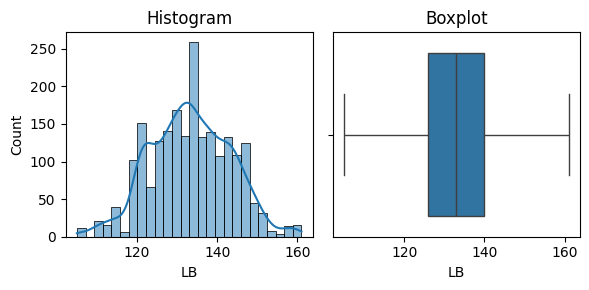

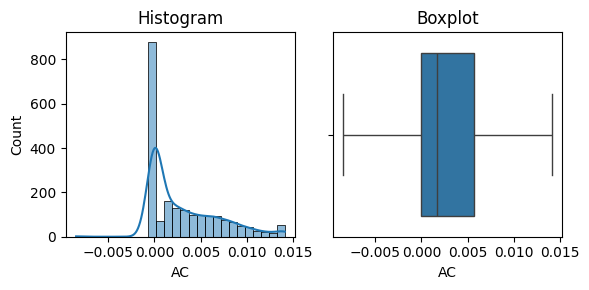

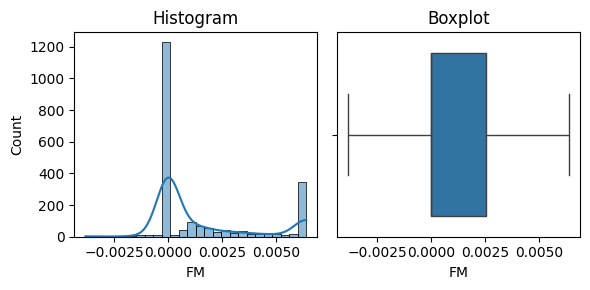

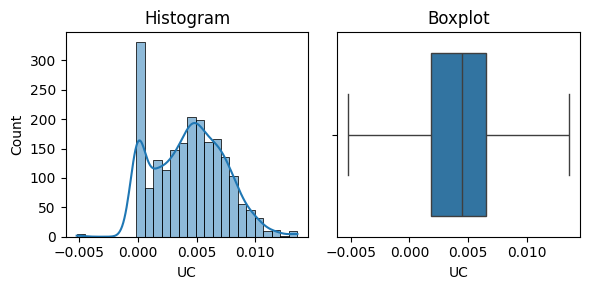

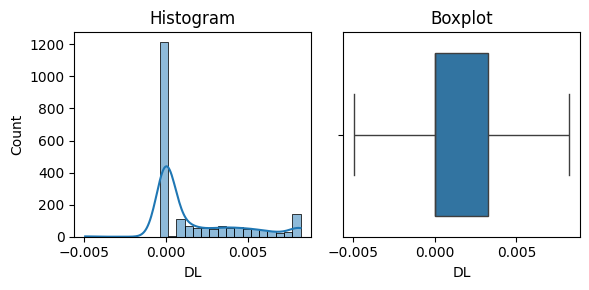

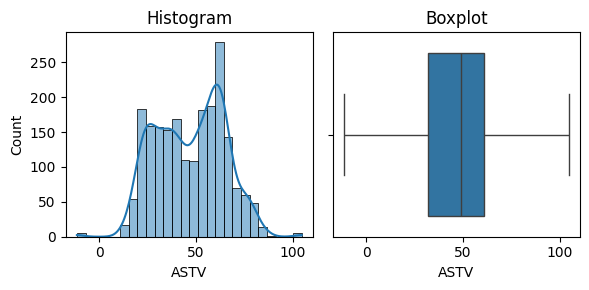

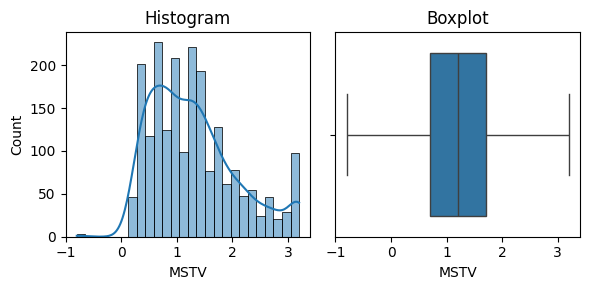

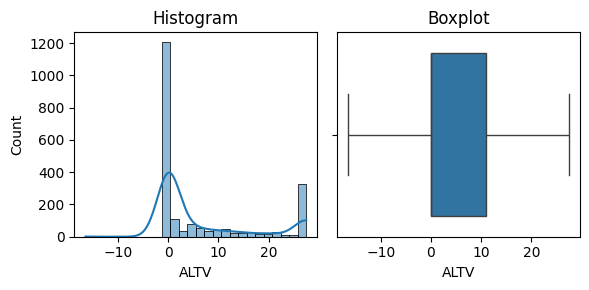

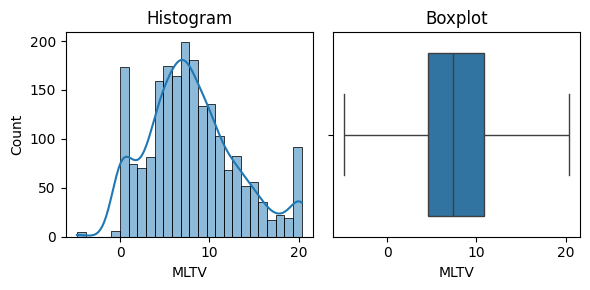

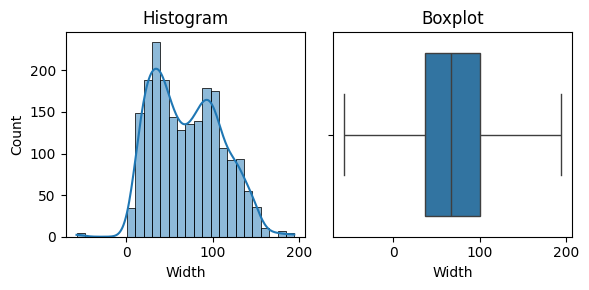

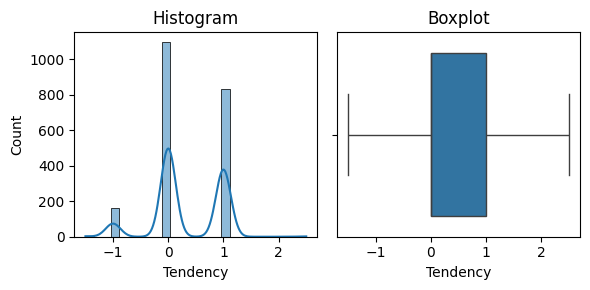

In [14]:
for cols in numerical_columns:
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plt.title('Histogram')
    sns.histplot(df[cols],kde=True)
    
    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(x=df[cols])
    
    plt.tight_layout()
    
    plt.show()
    

as we have already penalized the outliers using IQR therefore there is no such outliers present in data anymore but still there is some skewness in the histogram is present

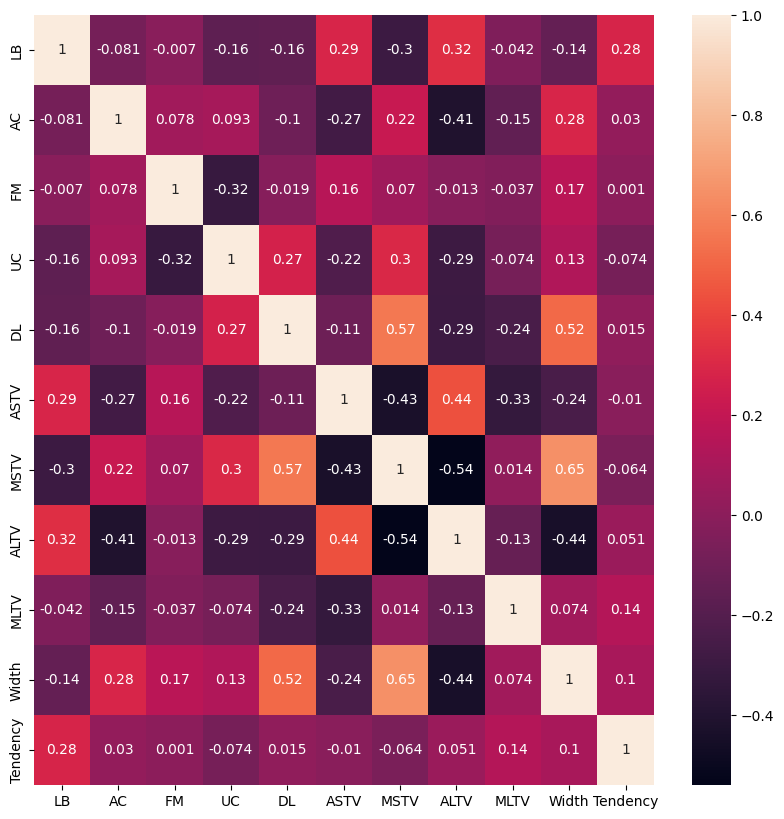

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df[numerical_columns].corr(),3),annot=True)
plt.show()

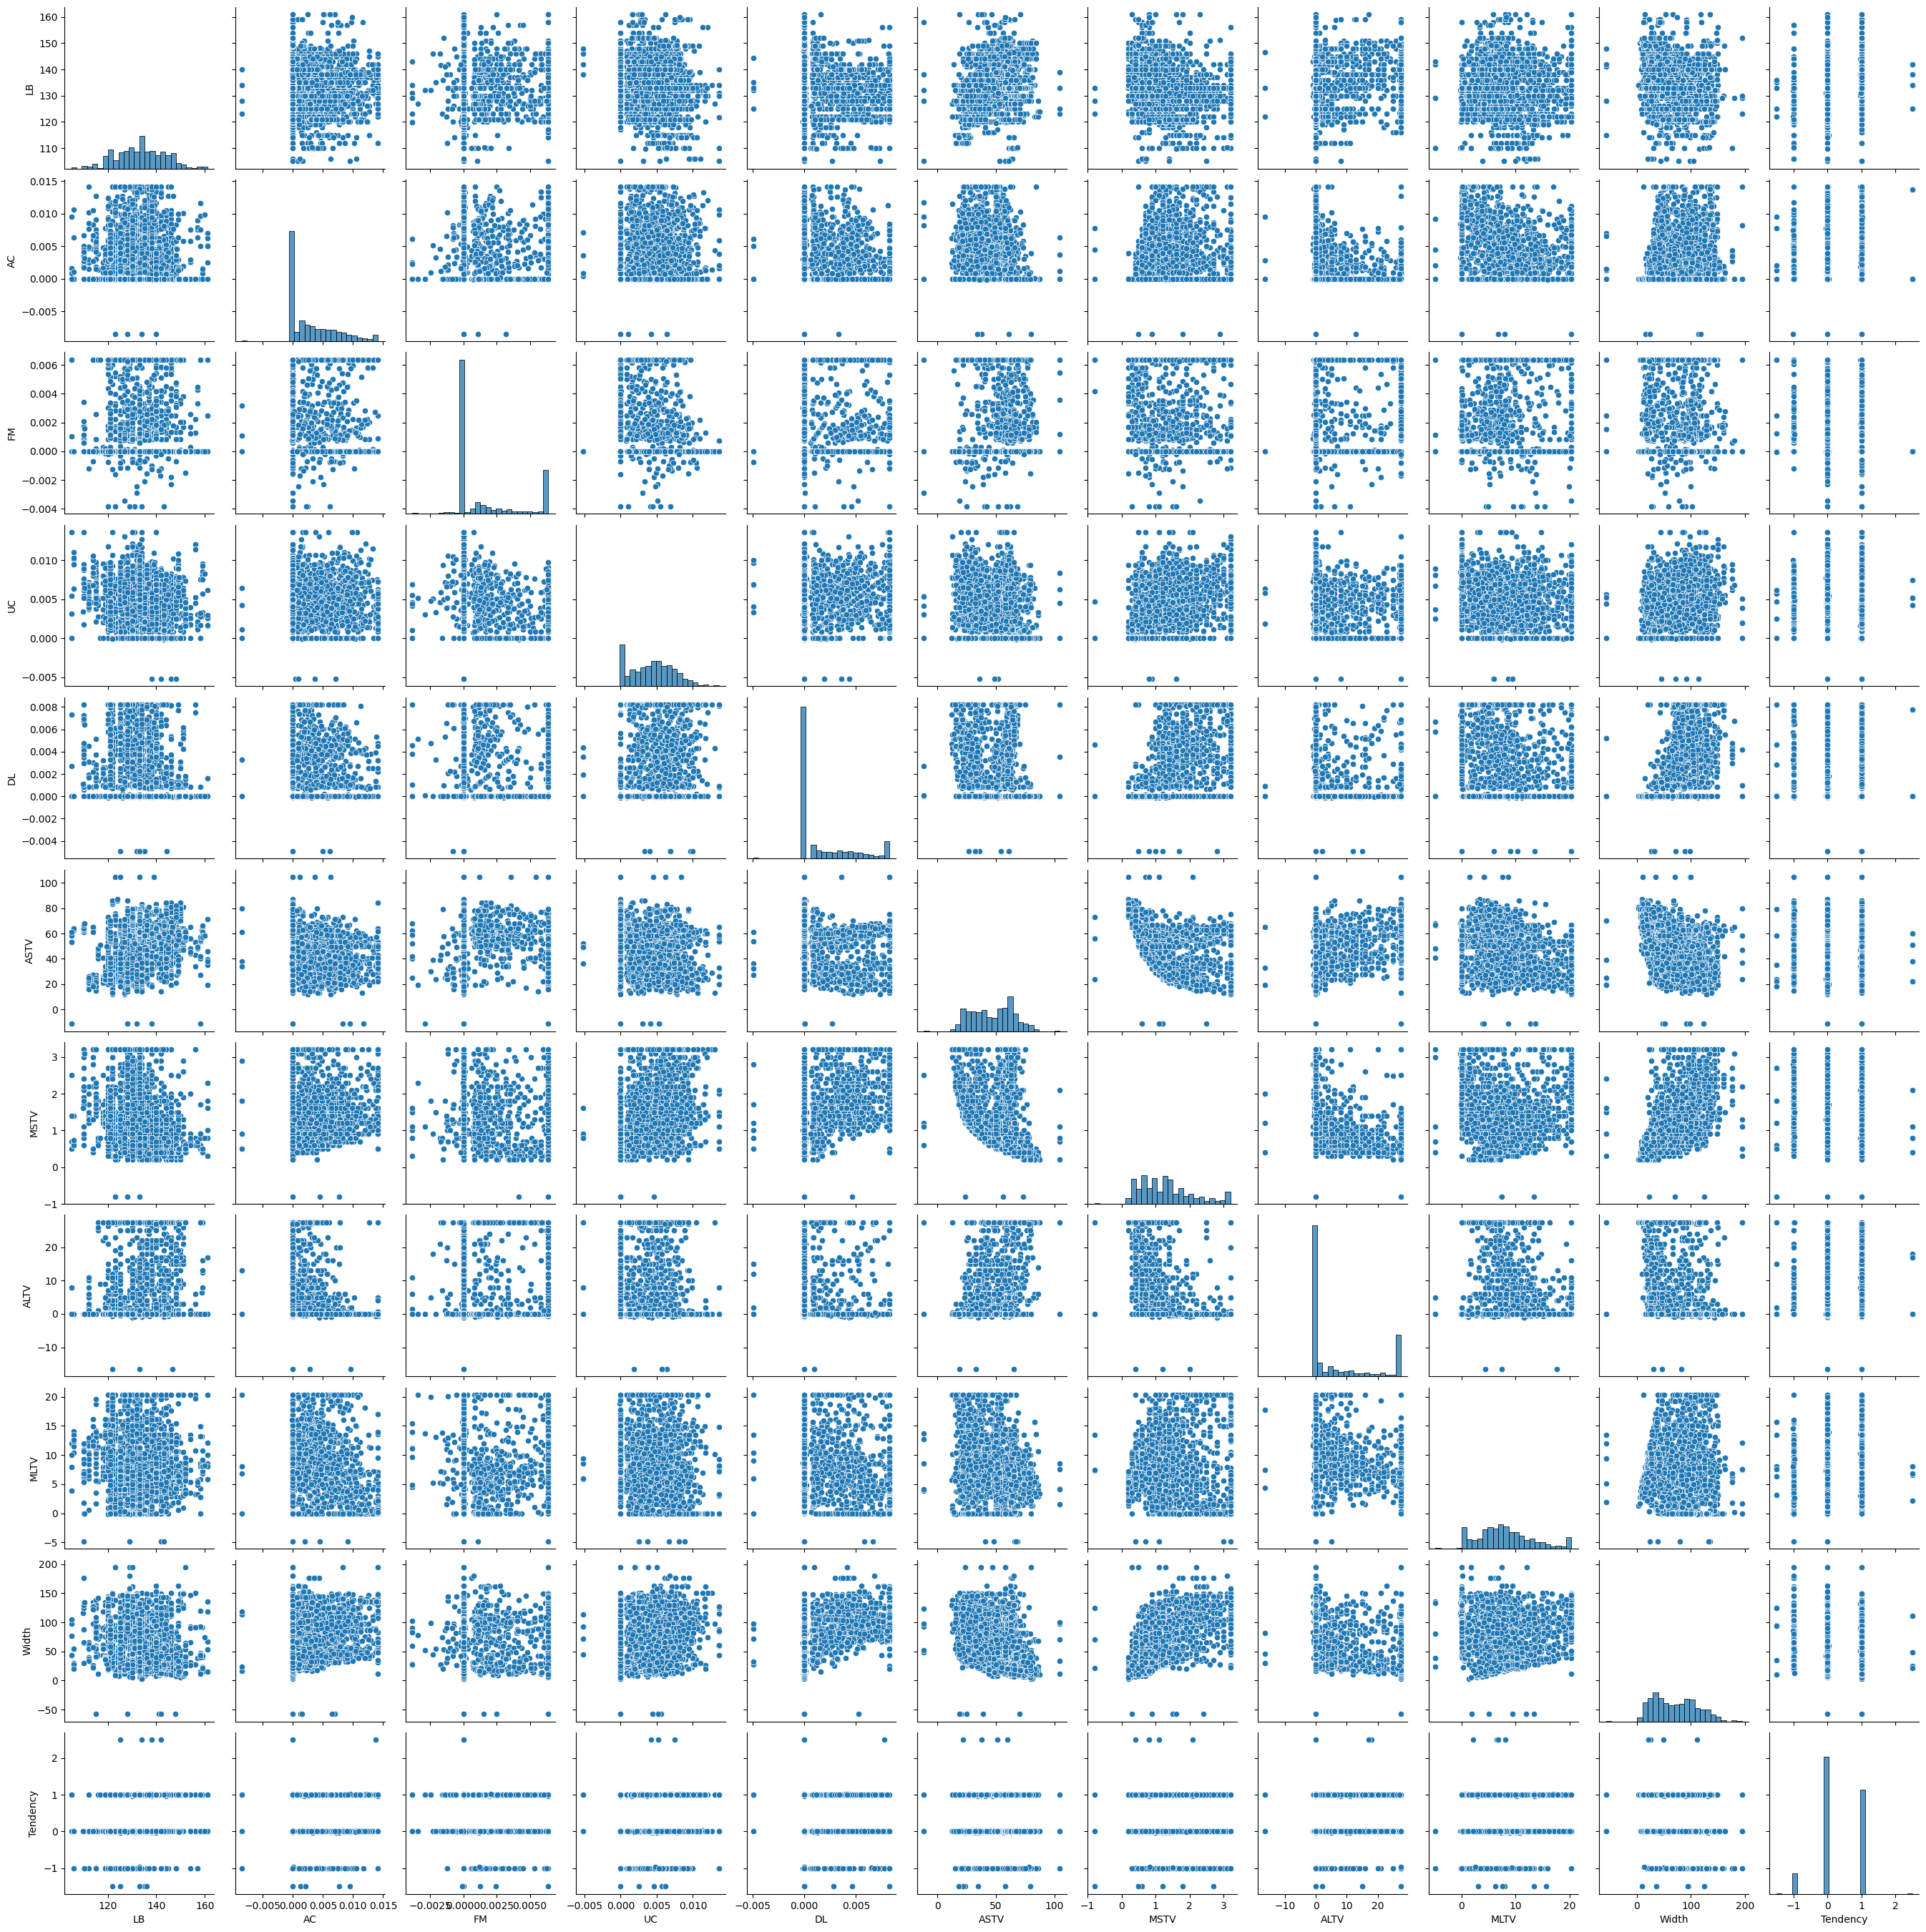

In [24]:
sns.pairplot(df[numerical_columns])
plt.show()

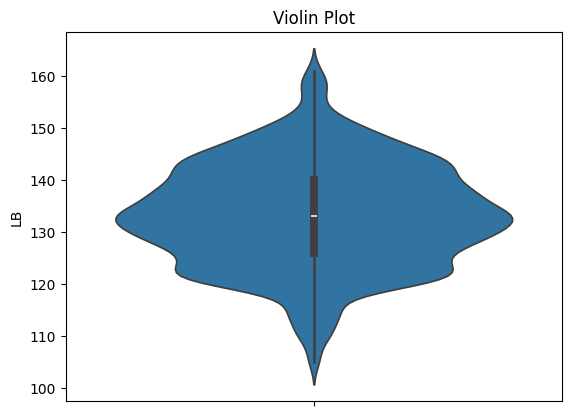

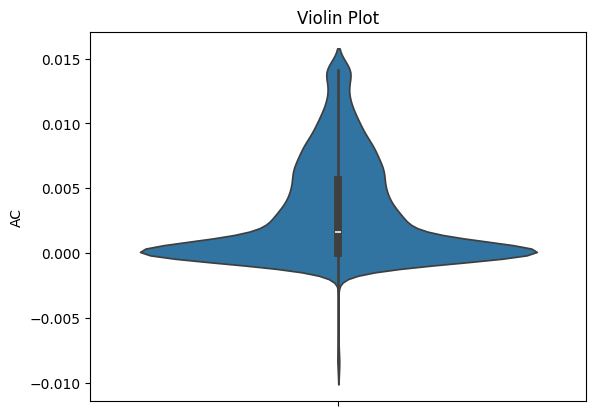

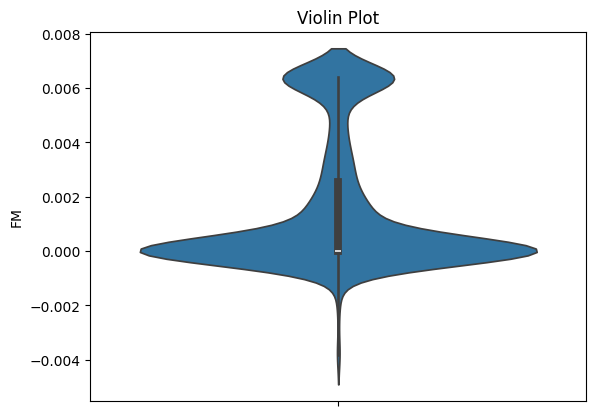

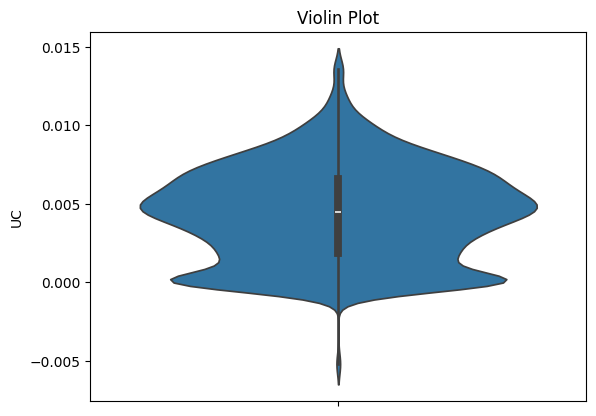

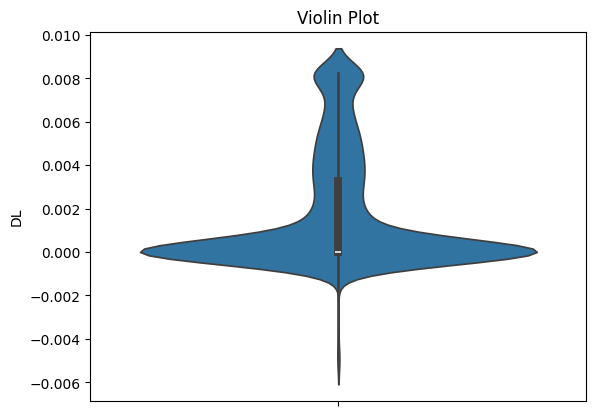

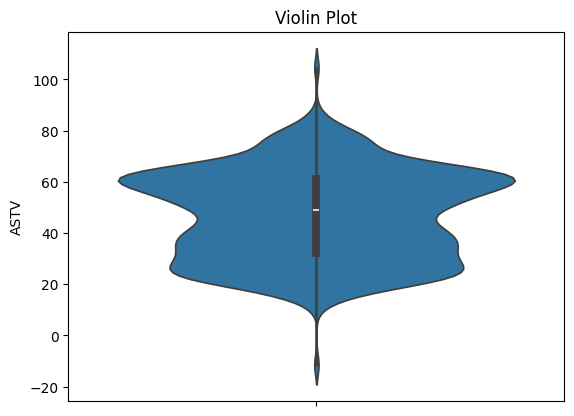

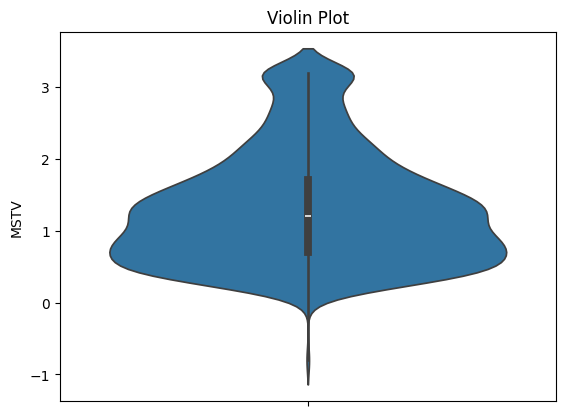

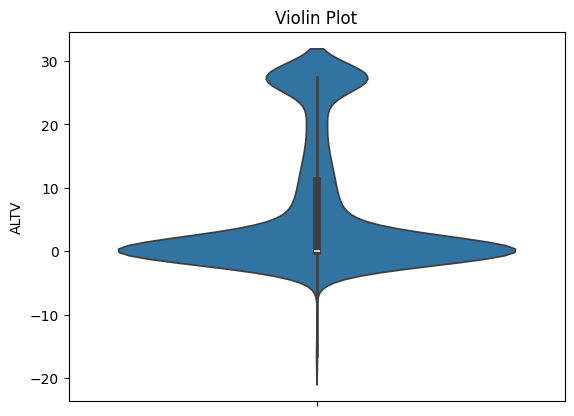

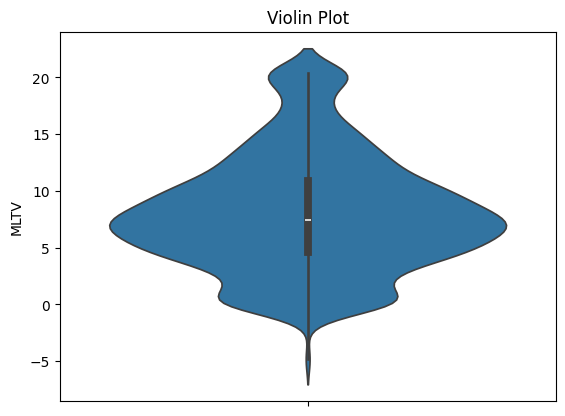

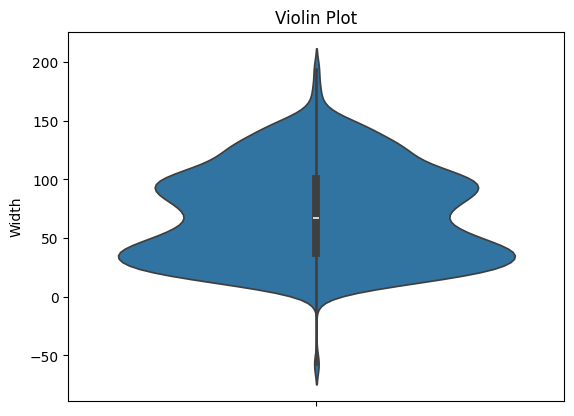

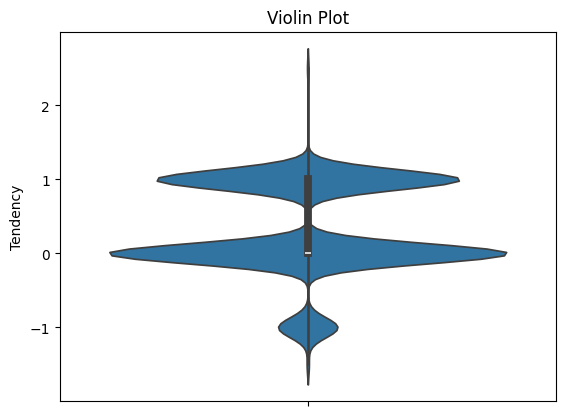

In [33]:
for cols in numerical_columns:
    plt.title('Violin Plot')
    sns.violinplot(df[cols])
    plt.show()